<a href="https://colab.research.google.com/github/rkaclfdl123/TIL/blob/master/1130_filename_%EC%97%B0%EA%B2%B0(%E1%84%80%E1%85%A9%E1%84%8C%E1%85%AE%E1%86%AB%E1%84%89%E1%85%AE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Astrophysics/1122_mount

/content/drive/.shortcut-targets-by-id/16oCueqwvnKt564dZ0WW_5p3nppsa07g8/Astrophysics/1122_mount


In [2]:
!pip install fastapi nest-asyncio pyngrok uvicorn

     |████████████████████████████████| 51 kB 490 kB/s 
     |████████████████████████████████| 745 kB 22.4 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 61 kB 238 kB/s 
     |████████████████████████████████| 10.1 MB 59.4 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19006 sha256=4cf33aff80bf49563d481d3d59c7ca25fad234c87e99c0126670316b0889c338
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [3]:
!pip install jinja2
!pip install aiofiles
!pip install python-multipart

  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=5d00191e8a44ed04b70d4ced6b33ad06e4cd425d67d1bbcf6114dd3d188a76b1
  Stored in directory: /root/.cache/pip/wheels/2c/41/7c/bfd1c180534ffdcc0972f78c5758f89881602175d48a8bcd2c
Successfully built python-multipart


In [4]:
from typing import Optional
from fastapi import FastAPI
from fastapi import FastAPI, File, UploadFile, Request, Form, File, UploadFile
from fastapi import FastAPI, status
from fastapi.responses import HTMLResponse
from typing import List
import os
import uvicorn
from fastapi import APIRouter
from fastapi.staticfiles import StaticFiles
import nest_asyncio
from pyngrok import ngrok
from fastapi.templating import Jinja2Templates
from PIL import Image
from io import BytesIO
import torch


In [ ]:
app = FastAPI()

@app.get("/")
def home(request: Request):
	'''
	Returns barebones HTML form allowing the user to select a file and model
	'''

	html_content = '''


    <html>
     <head>
      <meta charset="UTF-8" />
       <meta name="viewport" content="width=240, initial-scale=1.0" /> 
       <meta http-equiv="X-UA-Compatible" content="ie=edge" />
        <title>썸네일 만들기</title>
         </head> 
         <body>
          <input type="file" id="image" accept="image/*" onchange="setThumbnail(event);" multiple/>
           <div id="image_container"></div>
             <div>
    <label>Upload Image</label>
    <input name="file" type="file" multiple>
    <div>
      <label>Select YOLO Model</label>
      <select name="model_name">
        <option>yolov5s</option>
        <option>yolov5m</option>
        <option>yolov5l</option>
        <option>yolov5x</option>
      </select>
    </div>
  </div>
            <script> function setThumbnail(event) {
                 for (var image of event.target.files) {
                      var reader = new FileReader(); 
                      reader.onload = function(event) { 
                          var img = document.createElement("img");
                           img.setAttribute("src", event.target.result);
                            document.querySelector("div#image_container").appendChild(img);
                             }; console.log(image); reader.readAsDataURL(image); } } </script> 
          </body>
           </html>

<form method="post" enctype="multipart/form-data">

  <button type="submit">Submit</button>
</form>
'''

	return HTMLResponse(content=html_content, status_code=200)

def results_to_json(results, model,file):
    ''' Helper function for process_home_form()'''
    return [
        [
            {
                #"pred":float(pred)
                # "model":str(results.xyxyn),
                # "class": int(pred[5]),
                # "class_name": model.model.names[int(pred[5])],
                # "normalized_box": pred[:4].tolist(),
                # "confidence": float(pred[4]),
                # "acc1":(float(pred[0])),
                # "acc2":(float(pred[1])),
                # "acc3":(float(pred[2])),
                # "acc4":(float(pred[3])),
                # "acc5":(float(pred[4])),
                # "acc6":(float(pred[5]))
                str(file.filename),
                #"filename222":result3[1],
                #"filename333":result3[2]
             }
            #for pred in result
        ]
        #switch this to results.xyxy to get bbox pixels
        for result in results.xyxyn

    ]

@app.post("/")
async def process_home_form(file: UploadFile = File(...), 
							model_name: str = Form(...)):
    
    
    #[[{"filename111":"<starlette.datastructures.UploadFile object at 0x7fca1fe12f50>"},
	print(str(file))#result3=file.filename,
    
	model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/Astrophysics/1122_mount/yolov5/runs/train/multiple_yolov5s_results/weights/best.pt')
      
  #This is how you decode + process image with PIL
	results = model( Image.open(BytesIO(await file.read())))
    #main(opt)
    
  #This is how you decode + process image with OpenCV
  #results = model(cv2.imdecode(np.fromstring(await file.read(), np.uint8), cv2.IMREAD_COLOR))

	json_results = results_to_json(results,model,file)

	return json_results,main(str(file.filename))

ngrok_tunnel = ngrok.connect(8000)
print('Public URL :' , ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, host='0.0.0.0', port=8000)

Opening tunnel named: http-8000-f277113a-d460-461a-a111-fbcae63d1659
t=2021-11-30T05:54:41+0000 lvl=info msg="no configuration paths supplied"
t=2021-11-30T05:54:41+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
t=2021-11-30T05:54:41+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
t=2021-11-30T05:54:41+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
t=2021-11-30T05:54:41+0000 lvl=info msg="tunnel session started" obj=tunnels.session
t=2021-11-30T05:54:41+0000 lvl=info msg="client session established" obj=csess id=19e40be54893
t=2021-11-30T05:54:41+0000 lvl=info msg=start pg=/api/tunnels id=6682d90539c0fe11
t=2021-11-30T05:54:41+0000 lvl=info msg=end pg=/api/tunnels id=6682d90539c0fe11 status=200 dur=261.92µs
t=2021-11-30T05:54:41+0000 lvl=info msg=start pg=/api/tunnels id=d0735636215a48a2
t=2021-11-30T05:54:41+0000 lvl=info msg=end pg=/api/tunnels id=d0735636215a48a2 status=200 dur=127.229µs
t=2

Public URL : http://ce3b-34-91-181-111.ngrok.io


t=2021-11-30T05:54:42+0000 lvl=info msg=start pg="/api/tunnels/http-8000-f277113a-d460-461a-a111-fbcae63d1659 (http)" id=a96035e2542032b0
t=2021-11-30T05:54:42+0000 lvl=info msg=end pg="/api/tunnels/http-8000-f277113a-d460-461a-a111-fbcae63d1659 (http)" id=a96035e2542032b0 status=200 dur=170.03µs
INFO:     Started server process [60]
Started server process [60]
INFO:     Waiting for application startup.
Waiting for application startup.
INFO:     Application startup complete.
Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
t=2021-11-30T05:54:45+0000 lvl=info msg="join connections" obj=join id=c9b951130d9a l=127.0.0.1:8000 r=222.99.3.47:5484
t=2021-11-30T05:54:47+0000 lvl=info msg="join connections" obj=join id=c667671937ed l=127.0.0.1:8000 r=222.99.3.47:5485


INFO:     222.99.3.47:0 - "GET / HTTP/1.1" 200 OK
INFO:     211.117.24.132:0 - "GET / HTTP/1.1" 200 OK
INFO:     222.99.3.47:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found


In [184]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/Astrophysics/1122_mount/yolov5/runs/train/multiple_yolov5s_results/weights/best.pt')

NameError: ignored

In [192]:
@app.post("/")
async def process_home_form(file: UploadFile = File(...), 
							model_name: str = Form(...)):
    print(file)

YOLOv5 🚀 2021-11-30 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7042489 parameters, 0 gradients
image 1/3 /content/drive/MyDrive/train_2/H_8424-20-1000_01_322_png.rf.1af472436ef19df86dd1f7ecf8909bf2.jpg: 640x640 2 Guns, Done. (0.526s)


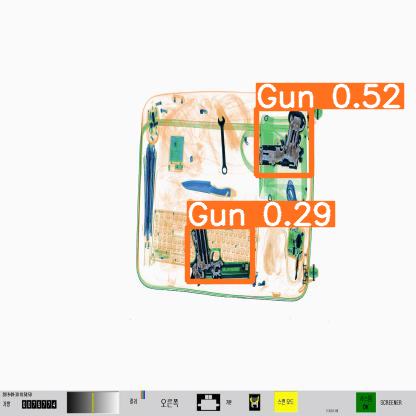

image 2/3 /content/drive/MyDrive/train_2/H_9506.91-0000_01_133.png: 384x640 1 Gun, Done. (0.294s)


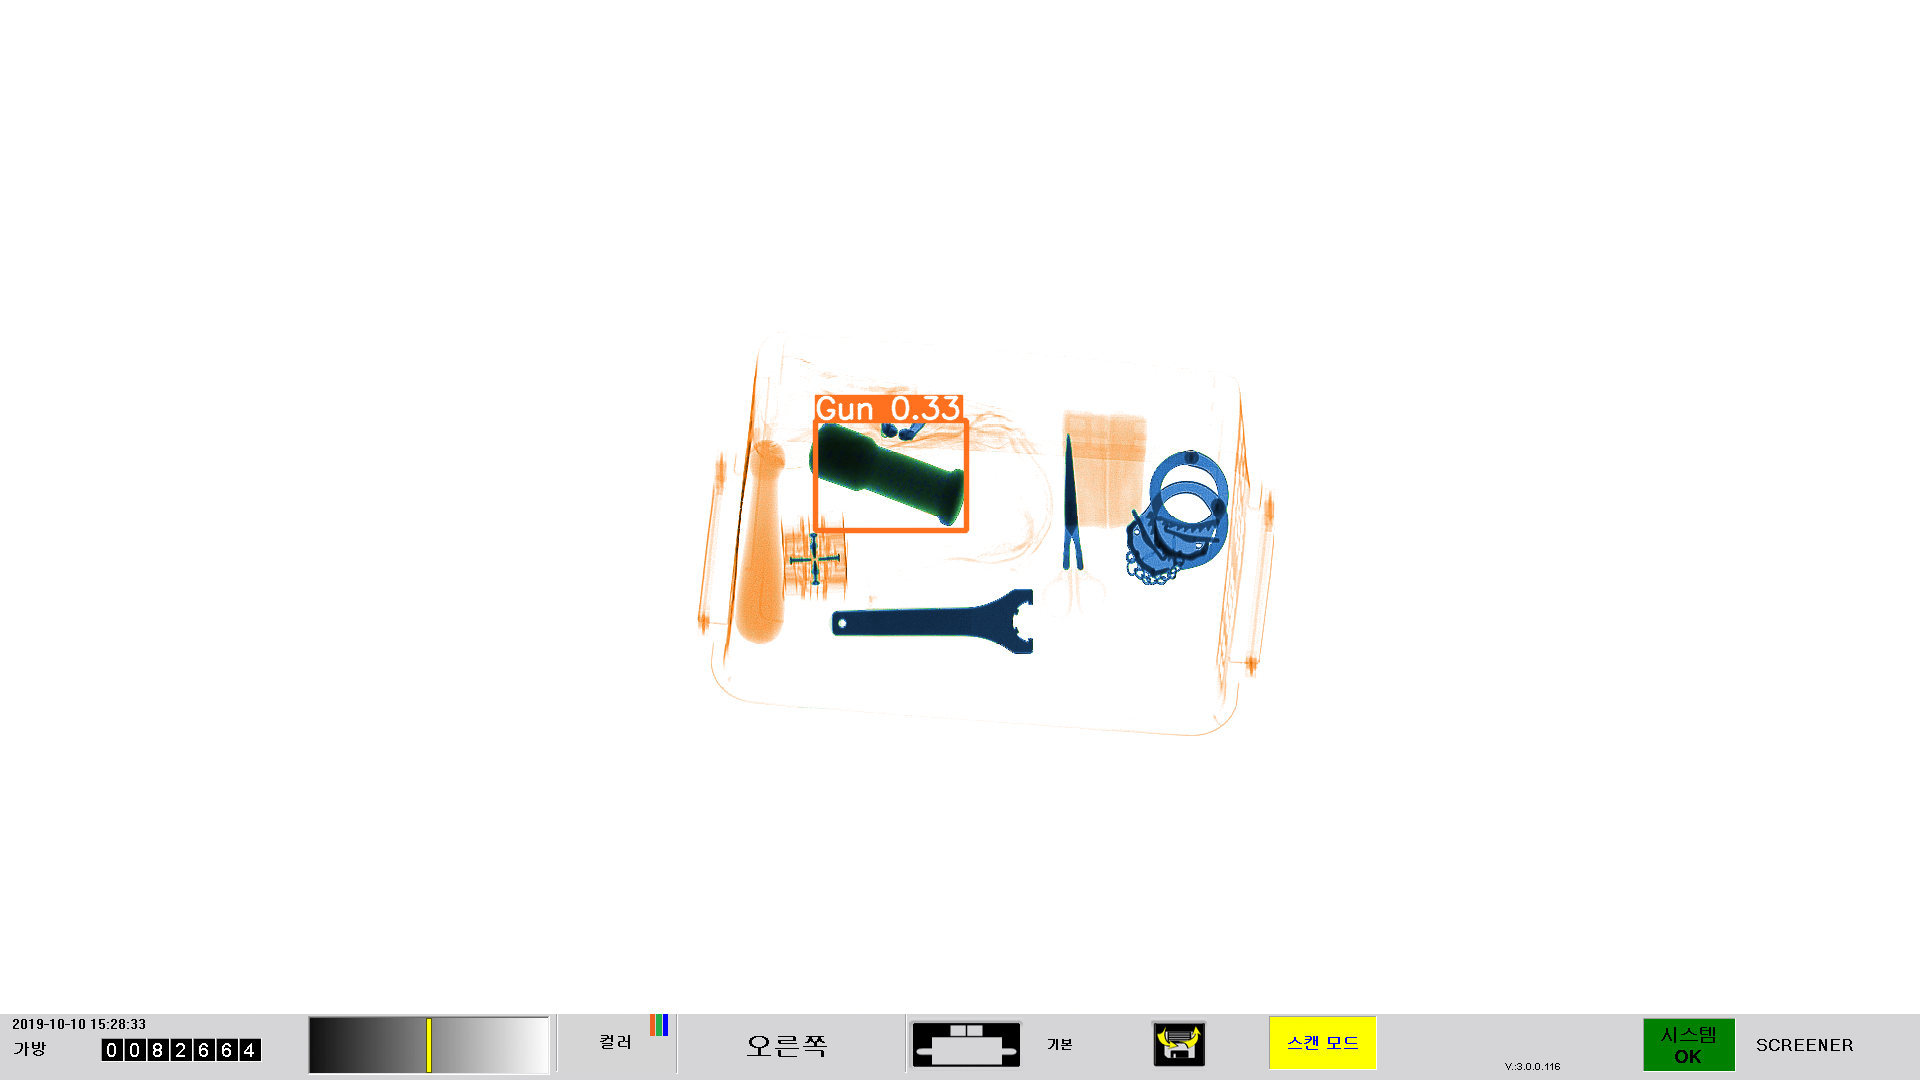

image 3/3 /content/drive/MyDrive/train_2/H_9506.91-0000_01_134.png: 384x640 3 Guns, Done. (0.371s)


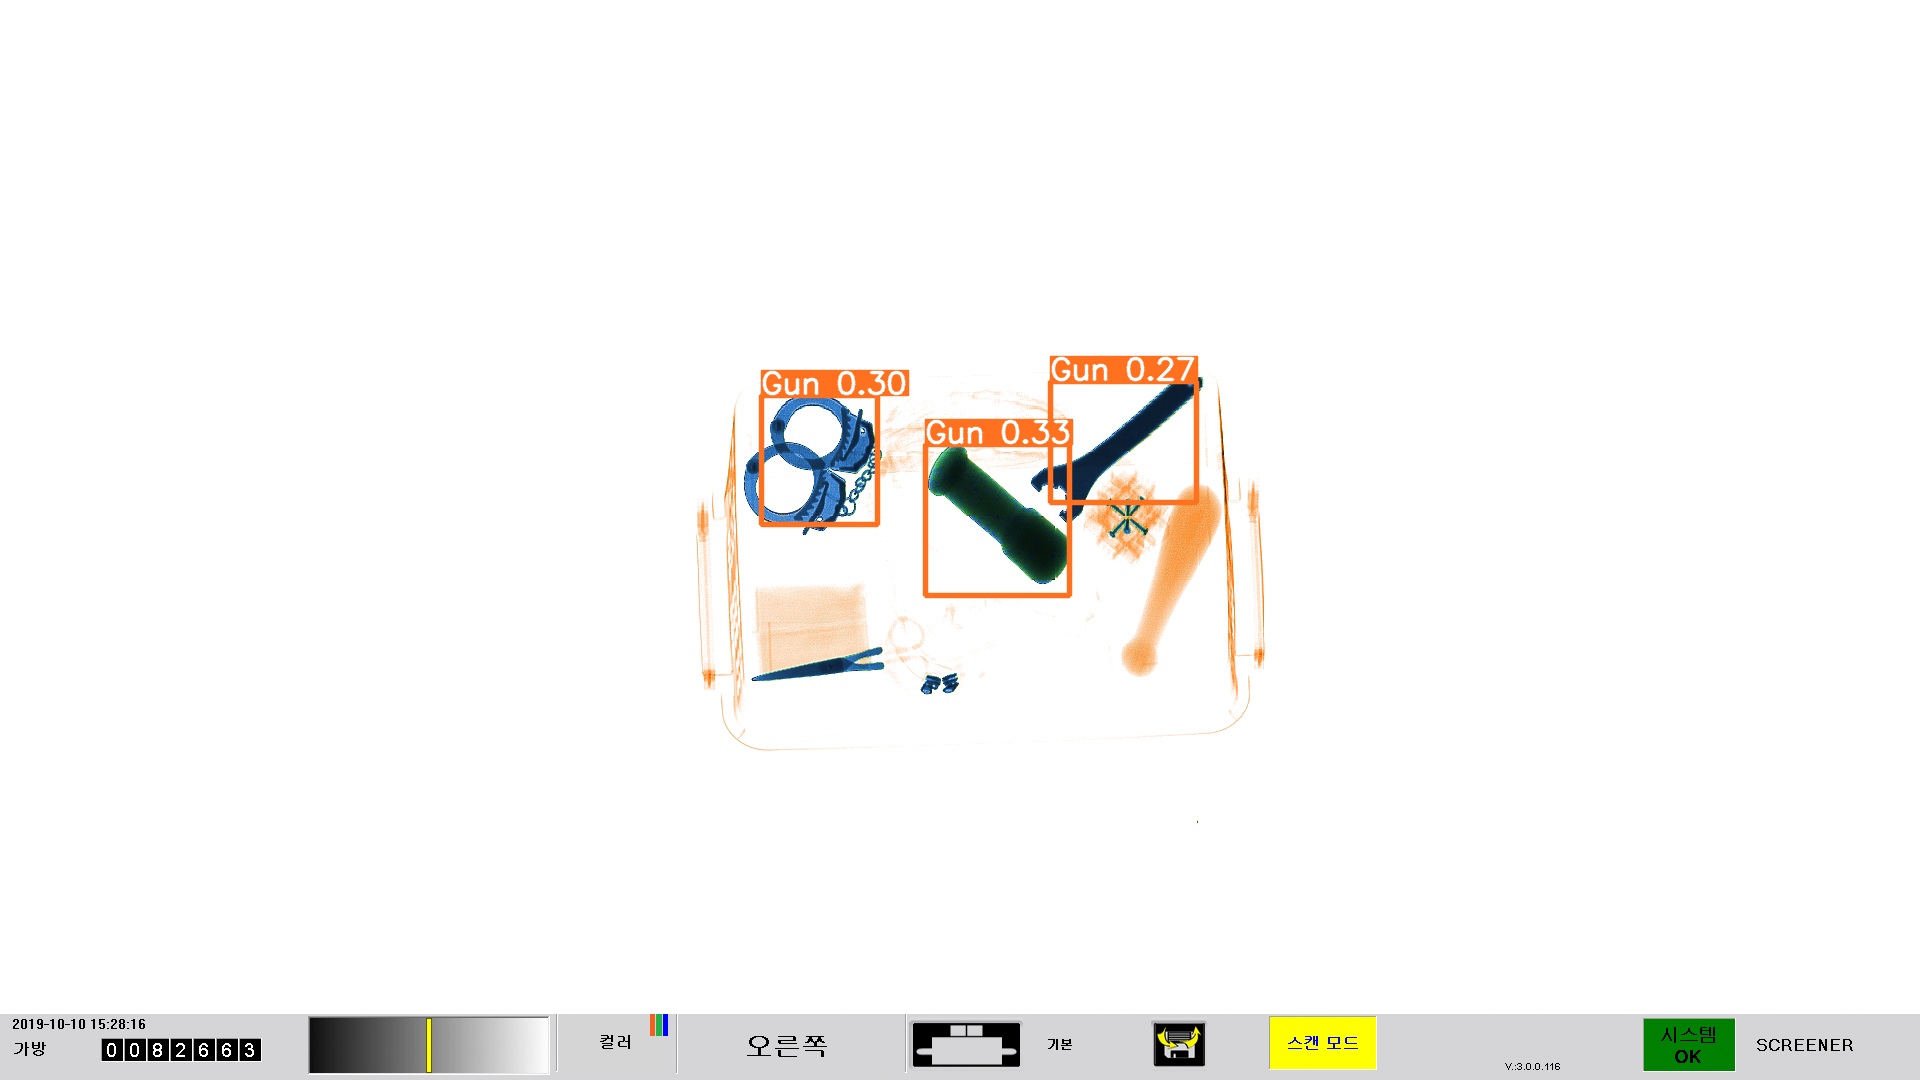

In [127]:
# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
"""
Run inference on images, videos, directories, streams, etc.

Usage:
    $ python path/to/detect.py --weights yolov5s.pt --source 0  # webcam
                                                             img.jpg  # image
                                                             vid.mp4  # video
                                                             path/  # directory
                                                             path/*.jpg  # glob
                                                             'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                                                             'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
"""

import argparse
import os
import sys
from pathlib import Path

import cv2
import torch
import torch.backends.cudnn as cudnn
from models.common import DetectMultiBackend
from utils.datasets import IMG_FORMATS, VID_FORMATS, LoadImages, LoadStreams
from utils.general import (LOGGER, check_file, check_img_size, check_imshow, check_requirements, colorstr,
                           increment_path, non_max_suppression, print_args, scale_coords, strip_optimizer, xyxy2xywh)
from utils.plots import Annotator, colors, save_one_box
from utils.torch_utils import select_device, time_sync
#추가
from google.colab.patches import cv2_imshow




#FILE = Path(__file__).resolve()
#ROOT = FILE.parents[0]  # YOLOv5 root directory
ROOT='/content/drive/MyDrive/Astrophysics/1122_mount/yolov5'
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))  # add ROOT to PATH
ROOT = Path(os.path.relpath(ROOT, Path.cwd()))



@torch.no_grad()
def run(weights=ROOT / 'yolov5s.pt',  # model.pt path(s)
        source=ROOT / '/content/drive/MyDrive/Astrophysics/train_2',  # file/dir/URL/glob, 0 for webcam
        imgsz=640,  # inference size (pixels)
        conf_thres=0.25,  # confidence threshold
        iou_thres=0.45,  # NMS IOU threshold
        max_det=1000,  # maximum detections per image
        device='',  # cuda device, i.e. 0 or 0,1,2,3 or cpu
        view_img=True,  # show results
        save_txt=False,  # save results to *.txt
        save_conf=False,  # save confidences in --save-txt labels
        save_crop=False,  # save cropped prediction boxes
        nosave=True,  # do not save images/videos
        classes=None,  # filter by class: --class 0, or --class 0 2 3
        agnostic_nms=False,  # class-agnostic NMS
        augment=False,  # augmented inference
        visualize=False,  # visualize features
        update=False,  # update all models
        project=ROOT / 'runs/detect',  # save results to project/name
        name='exp',  # save results to project/name
        exist_ok=True,  # existing project/name ok, do not increment
        line_thickness=3,  # bounding box thickness (pixels)
        hide_labels=False,  # hide labels

        hide_conf=False,  # hide confidences
        half=False,  # use FP16 half-precision inference
        dnn=False,  # use OpenCV DNN for ONNX inference
        ):
    source = str(source)
    save_img = not nosave and not source.endswith('.txt')  # save inference images
    is_file = Path(source).suffix[1:] in (IMG_FORMATS + VID_FORMATS)
    is_url = source.lower().startswith(('rtsp://', 'rtmp://', 'http://', 'https://'))
    webcam = source.isnumeric() or source.endswith('.txt') or (is_url and not is_file)
    if is_url and is_file:
        source = check_file(source)  # download

    # Directories
    save_dir = increment_path(Path(project) / name, exist_ok=exist_ok)  # increment run
    (save_dir / 'labels' if save_txt else save_dir).mkdir(parents=True, exist_ok=True)  # make dir

    # Load model
    device = select_device(device)
    model = DetectMultiBackend(weights, device=device, dnn=dnn)
    stride, names, pt, jit, onnx = model.stride, model.names, model.pt, model.jit, model.onnx
    imgsz = check_img_size(imgsz, s=stride)  # check image size

    # Half
    half &= pt and device.type != 'cpu'  # half precision only supported by PyTorch on CUDA
    if pt:
        model.model.half() if half else model.model.float()

    # Dataloader
    if webcam:
        view_img = check_imshow()
        cudnn.benchmark = True  # set True to speed up constant image size inference
        dataset = LoadStreams(source, img_size=imgsz, stride=stride, auto=pt and not jit)
        bs = len(dataset)  # batch_size
    else:
        dataset = LoadImages(source, img_size=imgsz, stride=stride, auto=pt and not jit)
        bs = 1  # batch_size
    vid_path, vid_writer = [None] * bs, [None] * bs

    # Run inference
    # if pt and device.type != 'cpu':
        #  model(torch.zeros(1, 3, *imgsz).to(device).type_as(next(model.model.parameters())))  # warmup
    dt, seen = [0.0, 0.0, 0.0], 0
    for path, im, im0s, vid_cap, s in dataset:
        t1 = time_sync()
        im = torch.from_numpy(im).to(device)
        im = im.half() if half else im.float()  # uint8 to fp16/32
        im /= 255  # 0 - 255 to 0.0 - 1.0
        if len(im.shape) == 3:
            im = im[None]  # expand for batch dim
        t2 = time_sync()
        dt[0] += t2 - t1

        # Inference
        visualize = increment_path(save_dir / Path(path).stem, mkdir=True) if visualize else False
        pred = model(im, augment=augment, visualize=visualize)
        t3 = time_sync()
        dt[1] += t3 - t2

        # NMS
        pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)
        dt[2] += time_sync() - t3

        # Second-stage classifier (optional)
        # pred = utils.general.apply_classifier(pred, classifier_model, im, im0s)

        # Process predictions
        for i, det in enumerate(pred):  # per image
            seen += 1
            if webcam:  # batch_size >= 1
                p, im0, frame = path[i], im0s[i].copy(), dataset.count
                s += f'{i}: '
            else:
                p, im0, frame = path, im0s.copy(), getattr(dataset, 'frame', 0)

            p = Path(p)  # to Path
            save_path = str(save_dir / p.name)  # im.jpg
            txt_path = str(save_dir / 'labels' / p.stem) + ('' if dataset.mode == 'image' else f'_{frame}')  # im.txt
            s += '%gx%g ' % im.shape[2:]  # print string
            gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  # normalization gain whwh
            imc = im0.copy() if save_crop else im0  # for save_crop
            annotator = Annotator(im0, line_width=line_thickness, example=str(names))
            if len(det):
                # Rescale boxes from img_size to im0 size
                det[:, :4] = scale_coords(im.shape[2:], det[:, :4], im0.shape).round()

                # Print results
                for c in det[:, -1].unique():
                    n = (det[:, -1] == c).sum()  # detections per class
                    s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string

                # Write results
                for *xyxy, conf, cls in reversed(det):
                    if save_txt:  # Write to file
                        xywh = (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / gn).view(-1).tolist()  # normalized xywh
                        line = (cls, *xywh, conf) if save_conf else (cls, *xywh)  # label format
                        with open(txt_path + '.txt', 'a') as f:
                            f.write(('%g ' * len(line)).rstrip() % line + '\n')

                    if save_img or save_crop or view_img:  # Add bbox to image
                        c = int(cls)  # integer class
                        label = None if hide_labels else (names[c] if hide_conf else f'{names[c]} {conf:.2f}')
                        annotator.box_label(xyxy, label, color=colors(c, True))
                        if save_crop:
                            save_one_box(xyxy, imc, file=save_dir / 'crops' / names[c] / f'{p.stem}.jpg', BGR=True)

            # Print time (inference-only)
            LOGGER.info(f'{s}Done. ({t3 - t2:.3f}s)')

            # Stream results
            im0 = annotator.result()
            if view_img:
                cv2_imshow(im0)
                #cv2_waitKey(1)  # 1 millisecond
                #cv2.destroyAllWindows()

            # Save results (image with detections)
            if save_img:
                if dataset.mode == 'image':
                    cv2.imwrite(save_path, im0)
                else:  # 'video' or 'stream'
                    if vid_path[i] != save_path:  # new video
                        vid_path[i] = save_path
                        if isinstance(vid_writer[i], cv2.VideoWriter):
                            vid_writer[i].release()  # release previous video writer
                        if vid_cap:  # video
                            fps = vid_cap.get(cv2.CAP_PROP_FPS)
                            w = int(vid_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                            h = int(vid_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                        else:  # stream
                            fps, w, h = 30, im0.shape[1], im0.shape[0]
                            save_path += '.mp4'
                        vid_writer[i] = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))
                    vid_writer[i].write(im0)

    # Print results
    t = tuple(x / seen * 1E3 for x in dt)  # speeds per image
    #LOGGER.info(f'Speed: %.1fms pre-process, %.1fms inference, %.1fms NMS per image at shape {(1, 3, *imgsz)}' % t)
    if save_txt or save_img:
        s = f"\n{len(list(save_dir.glob('labels/*.txt')))} labels saved to {save_dir / 'labels'}" if save_txt else ''
        LOGGER.info(f"Results saved to {colorstr('bold', save_dir)}{s}")
    if update:
        strip_optimizer(weights)  # update model (to fix SourceChangeWarning)


def parse_opt():
    import easydict
    opt = easydict.EasyDict({
 
        "weights": '/content/drive/MyDrive/Astrophysics/1122_mount/yolov5/runs/train/multiple_yolov5s_results/weights/best.pt',
 
        "conf": 0.5,
 
        "save-txt": True,
 
        "save-conf": True,
 
        "source": "/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/images/H_8424-20-1000_01_318_png.rf.3a9a8164ddb2baf54ba813b62714c76b.jpg"
    })

# !python /content/drive/MyDrive/Astrophysics/1122_mount/yolov5/detect.py 
# --weights /content/drive/MyDrive/Astrophysics/1122_mount/yolov5/runs/train/multiple_yolov5s_results/weights/best.pt 
# --img 416  
# --conf 0.5  
# --save-txt 
# --save-conf 
# --source "/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/images/H_8424-20-1000_01_318_png.rf.3a9a8164ddb2baf54ba813b62714c76b.jpg"







    # parser = argparse.ArgumentParser()
    # parser.add_argument('--weights', nargs='+', type=str, default=ROOT / 'yolov5s.pt', help='model path(s)')
    # parser.add_argument('--source', type=str, default=ROOT / 'data/images', help='file/dir/URL/glob, 0 for webcam')
    # parser.add_argument('--imgsz', '--img', '--img-size', nargs='+', type=int, default=[640], help='inference size h,w')
    # parser.add_argument('--conf-thres', type=float, default=0.25, help='confidence threshold')
    # parser.add_argument('--iou-thres', type=float, default=0.45, help='NMS IoU threshold')
    # parser.add_argument('--max-det', type=int, default=1000, help='maximum detections per image')
    # parser.add_argument('--device', default='', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
    # parser.add_argument('--view-img', action='store_true', help='show results')
    # parser.add_argument('--save-txt', action='store_true', help='save results to *.txt')
    # parser.add_argument('--save-conf', action='store_true', help='save confidences in --save-txt labels')
    # parser.add_argument('--save-crop', action='store_true', help='save cropped prediction boxes')
    # parser.add_argument('--nosave', action='store_true', help='do not save images/videos')
    # parser.add_argument('--classes', nargs='+', type=int, help='filter by class: --classes 0, or --classes 0 2 3')
    # parser.add_argument('--agnostic-nms', action='store_true', help='class-agnostic NMS')
    # parser.add_argument('--augment', action='store_true', help='augmented inference')
    # parser.add_argument('--visualize', action='store_true', help='visualize features')
    # parser.add_argument('--update', action='store_true', help='update all models')
    # parser.add_argument('--project', default=ROOT / 'runs/detect', help='save results to project/name')
    # parser.add_argument('--name', default='exp', help='save results to project/name')
    # parser.add_argument('--exist-ok', action='store_true', help='existing project/name ok, do not increment')
    # parser.add_argument('--line-thickness', default=3, type=int, help='bounding box thickness (pixels)')
    # parser.add_argument('--hide-labels', default=False, action='store_true', help='hide labels')
    # parser.add_argument('--hide-conf', default=False, action='store_true', help='hide confidences')
    # parser.add_argument('--half', action='store_true', help='use FP16 half-precision inference')
    # parser.add_argument('--dnn', action='store_true', help='use OpenCV DNN for ONNX inference')
    # opt = parser.parse_args()
    #opt.imgsz *= 2 if len(opt.imgsz) == 1 else 1  # expand
    #print_args(FILE.stem, opt)
    return opt.weights


def main(opt):
    #check_requirements(exclude=('tensorboard', 'thop'))
    run(opt)


if __name__ == "__main__":
    opt = parse_opt()
    main(opt)


In [166]:
# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
"""
Run inference on images, videos, directories, streams, etc.

Usage:
    $ python path/to/detect.py --weights yolov5s.pt --source 0  # webcam
                                                             img.jpg  # image
                                                             vid.mp4  # video
                                                             path/  # directory
                                                             path/*.jpg  # glob
                                                             'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                                                             'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
"""
from typing import Optional
from fastapi import FastAPI
from fastapi import FastAPI, File, UploadFile, Request, Form, File, UploadFile
from fastapi import FastAPI, status
from fastapi.responses import HTMLResponse
from typing import List
import os
import uvicorn
from fastapi import APIRouter
from fastapi.staticfiles import StaticFiles
import nest_asyncio
from pyngrok import ngrok
from fastapi.templating import Jinja2Templates
from PIL import Image
from io import BytesIO
import torch

import argparse
import os
import sys
from pathlib import Path

import cv2
import torch
import torch.backends.cudnn as cudnn
from models.common import DetectMultiBackend
from utils.datasets import IMG_FORMATS, VID_FORMATS, LoadImages, LoadStreams
from utils.general import (LOGGER, check_file, check_img_size, check_imshow, check_requirements, colorstr,
                           increment_path, non_max_suppression, print_args, scale_coords, strip_optimizer, xyxy2xywh)
from utils.plots import Annotator, colors, save_one_box
from utils.torch_utils import select_device, time_sync
#추가
from google.colab.patches import cv2_imshow




#FILE = Path(__file__).resolve()
#ROOT = FILE.parents[0]  # YOLOv5 root directory
ROOT='/content/drive/MyDrive/Astrophysics/1122_mount/yolov5'
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))  # add ROOT to PATH
ROOT = Path(os.path.relpath(ROOT, Path.cwd()))



@torch.no_grad()
def run(weights=ROOT / 'yolov5s.pt',  # model.pt path(s)
        source=ROOT / '/content/drive/MyDrive/Astrophysics/train_2',  # file/dir/URL/glob, 0 for webcam
        imgsz=640,  # inference size (pixels)
        conf_thres=0.25,  # confidence threshold
        iou_thres=0.45,  # NMS IOU threshold
        max_det=1000,  # maximum detections per image
        device='',  # cuda device, i.e. 0 or 0,1,2,3 or cpu
        view_img=True,  # show results
        save_txt=False,  # save results to *.txt
        save_conf=False,  # save confidences in --save-txt labels
        save_crop=False,  # save cropped prediction boxes
        nosave=True,  # do not save images/videos
        classes=None,  # filter by class: --class 0, or --class 0 2 3
        agnostic_nms=False,  # class-agnostic NMS
        augment=False,  # augmented inference
        visualize=False,  # visualize features
        update=False,  # update all models
        project=ROOT / 'runs/detect',  # save results to project/name
        name='exp',  # save results to project/name
        exist_ok=True,  # existing project/name ok, do not increment
        line_thickness=3,  # bounding box thickness (pixels)
        hide_labels=False,  # hide labels

        hide_conf=False,  # hide confidences
        half=False,  # use FP16 half-precision inference
        dnn=False,  # use OpenCV DNN for ONNX inference
        ):
    source = str(source)
    save_img = not nosave and not source.endswith('.txt')  # save inference images
    is_file = Path(source).suffix[1:] in (IMG_FORMATS + VID_FORMATS)
    is_url = source.lower().startswith(('rtsp://', 'rtmp://', 'http://', 'https://'))
    webcam = source.isnumeric() or source.endswith('.txt') or (is_url and not is_file)
    if is_url and is_file:
        source = check_file(source)  # download

    # Directories
    save_dir = increment_path(Path(project) / name, exist_ok=exist_ok)  # increment run
    (save_dir / 'labels' if save_txt else save_dir).mkdir(parents=True, exist_ok=True)  # make dir

    # Load model
    device = select_device(device)
    model = DetectMultiBackend(weights, device=device, dnn=dnn)
    stride, names, pt, jit, onnx = model.stride, model.names, model.pt, model.jit, model.onnx
    imgsz = check_img_size(imgsz, s=stride)  # check image size

    # Half
    half &= pt and device.type != 'cpu'  # half precision only supported by PyTorch on CUDA
    if pt:
        model.model.half() if half else model.model.float()

    # Dataloader
    if webcam:
        view_img = check_imshow()
        cudnn.benchmark = True  # set True to speed up constant image size inference
        dataset = LoadStreams(source, img_size=imgsz, stride=stride, auto=pt and not jit)
        bs = len(dataset)  # batch_size
    else:
        dataset = LoadImages(source, img_size=imgsz, stride=stride, auto=pt and not jit)
        bs = 1  # batch_size
    vid_path, vid_writer = [None] * bs, [None] * bs

    # Run inference
    # if pt and device.type != 'cpu':
        #  model(torch.zeros(1, 3, *imgsz).to(device).type_as(next(model.model.parameters())))  # warmup
    dt, seen = [0.0, 0.0, 0.0], 0
    for path, im, im0s, vid_cap, s in dataset:
        t1 = time_sync()
        im = torch.from_numpy(im).to(device)
        im = im.half() if half else im.float()  # uint8 to fp16/32
        im /= 255  # 0 - 255 to 0.0 - 1.0
        if len(im.shape) == 3:
            im = im[None]  # expand for batch dim
        t2 = time_sync()
        dt[0] += t2 - t1

        # Inference
        visualize = increment_path(save_dir / Path(path).stem, mkdir=True) if visualize else False
        pred = model(im, augment=augment, visualize=visualize)
        t3 = time_sync()
        dt[1] += t3 - t2

        # NMS
        pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)
        dt[2] += time_sync() - t3

        # Second-stage classifier (optional)
        # pred = utils.general.apply_classifier(pred, classifier_model, im, im0s)

        # Process predictions
        for i, det in enumerate(pred):  # per image
            seen += 1
            if webcam:  # batch_size >= 1
                p, im0, frame = path[i], im0s[i].copy(), dataset.count
                s += f'{i}: '
            else:
                p, im0, frame = path, im0s.copy(), getattr(dataset, 'frame', 0)

            p = Path(p)  # to Path
            save_path = str(save_dir / p.name)  # im.jpg
            txt_path = str(save_dir / 'labels' / p.stem) + ('' if dataset.mode == 'image' else f'_{frame}')  # im.txt
            s += '%gx%g ' % im.shape[2:]  # print string
            gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  # normalization gain whwh
            imc = im0.copy() if save_crop else im0  # for save_crop
            annotator = Annotator(im0, line_width=line_thickness, example=str(names))
            if len(det):
                # Rescale boxes from img_size to im0 size
                det[:, :4] = scale_coords(im.shape[2:], det[:, :4], im0.shape).round()

                # Print results
                for c in det[:, -1].unique():
                    n = (det[:, -1] == c).sum()  # detections per class
                    s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string

                # Write results
                for *xyxy, conf, cls in reversed(det):
                    if save_txt:  # Write to file
                        xywh = (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / gn).view(-1).tolist()  # normalized xywh
                        line = (cls, *xywh, conf) if save_conf else (cls, *xywh)  # label format
                        with open(txt_path + '.txt', 'a') as f:
                            f.write(('%g ' * len(line)).rstrip() % line + '\n')

                    if save_img or save_crop or view_img:  # Add bbox to image
                        c = int(cls)  # integer class
                        label = None if hide_labels else (names[c] if hide_conf else f'{names[c]} {conf:.2f}')
                        annotator.box_label(xyxy, label, color=colors(c, True))
                        if save_crop:
                            save_one_box(xyxy, imc, file=save_dir / 'crops' / names[c] / f'{p.stem}.jpg', BGR=True)

            # Print time (inference-only)
            LOGGER.info(f'{s}Done. ({t3 - t2:.3f}s)')

            # Stream results
            im0 = annotator.result()
            if view_img:
                cv2_imshow(im0)
                #cv2_waitKey(1)  # 1 millisecond
                #cv2.destroyAllWindows()

            # Save results (image with detections)
            if save_img:
                if dataset.mode == 'image':
                    cv2.imwrite(save_path, im0)
                else:  # 'video' or 'stream'
                    if vid_path[i] != save_path:  # new video
                        vid_path[i] = save_path
                        if isinstance(vid_writer[i], cv2.VideoWriter):
                            vid_writer[i].release()  # release previous video writer
                        if vid_cap:  # video
                            fps = vid_cap.get(cv2.CAP_PROP_FPS)
                            w = int(vid_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                            h = int(vid_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                        else:  # stream
                            fps, w, h = 30, im0.shape[1], im0.shape[0]
                            save_path += '.mp4'
                        vid_writer[i] = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))
                    vid_writer[i].write(im0)

    # Print results
    t = tuple(x / seen * 1E3 for x in dt)  # speeds per image
    #LOGGER.info(f'Speed: %.1fms pre-process, %.1fms inference, %.1fms NMS per image at shape {(1, 3, *imgsz)}' % t)
    if save_txt or save_img:
        s = f"\n{len(list(save_dir.glob('labels/*.txt')))} labels saved to {save_dir / 'labels'}" if save_txt else ''
        LOGGER.info(f"Results saved to {colorstr('bold', save_dir)}{s}")
    if update:
        strip_optimizer(weights)  # update model (to fix SourceChangeWarning)


def parse_opt():
    import easydict
    opt = easydict.EasyDict({
 
        "weights": '/content/drive/MyDrive/Astrophysics/1122_mount/yolov5/runs/train/multiple_yolov5s_results/weights/best.pt',
 
        "conf": 0.5,
 
        "save-txt": True,
 
        "save-conf": True,
 
        "source": "/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/images/H_8424-20-1000_01_318_png.rf.3a9a8164ddb2baf54ba813b62714c76b.jpg"
    })

# !python /content/drive/MyDrive/Astrophysics/1122_mount/yolov5/detect.py 
# --weights /content/drive/MyDrive/Astrophysics/1122_mount/yolov5/runs/train/multiple_yolov5s_results/weights/best.pt 
# --img 416  
# --conf 0.5  
# --save-txt 
# --save-conf 
# --source "/content/drive/MyDrive/Astrophysics/1122_mount/multiple2-1/train/images/H_8424-20-1000_01_318_png.rf.3a9a8164ddb2baf54ba813b62714c76b.jpg"







    # parser = argparse.ArgumentParser()
    # parser.add_argument('--weights', nargs='+', type=str, default=ROOT / 'yolov5s.pt', help='model path(s)')
    # parser.add_argument('--source', type=str, default=ROOT / 'data/images', help='file/dir/URL/glob, 0 for webcam')
    # parser.add_argument('--imgsz', '--img', '--img-size', nargs='+', type=int, default=[640], help='inference size h,w')
    # parser.add_argument('--conf-thres', type=float, default=0.25, help='confidence threshold')
    # parser.add_argument('--iou-thres', type=float, default=0.45, help='NMS IoU threshold')
    # parser.add_argument('--max-det', type=int, default=1000, help='maximum detections per image')
    # parser.add_argument('--device', default='', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
    # parser.add_argument('--view-img', action='store_true', help='show results')
    # parser.add_argument('--save-txt', action='store_true', help='save results to *.txt')
    # parser.add_argument('--save-conf', action='store_true', help='save confidences in --save-txt labels')
    # parser.add_argument('--save-crop', action='store_true', help='save cropped prediction boxes')
    # parser.add_argument('--nosave', action='store_true', help='do not save images/videos')
    # parser.add_argument('--classes', nargs='+', type=int, help='filter by class: --classes 0, or --classes 0 2 3')
    # parser.add_argument('--agnostic-nms', action='store_true', help='class-agnostic NMS')
    # parser.add_argument('--augment', action='store_true', help='augmented inference')
    # parser.add_argument('--visualize', action='store_true', help='visualize features')
    # parser.add_argument('--update', action='store_true', help='update all models')
    # parser.add_argument('--project', default=ROOT / 'runs/detect', help='save results to project/name')
    # parser.add_argument('--name', default='exp', help='save results to project/name')
    # parser.add_argument('--exist-ok', action='store_true', help='existing project/name ok, do not increment')
    # parser.add_argument('--line-thickness', default=3, type=int, help='bounding box thickness (pixels)')
    # parser.add_argument('--hide-labels', default=False, action='store_true', help='hide labels')
    # parser.add_argument('--hide-conf', default=False, action='store_true', help='hide confidences')
    # parser.add_argument('--half', action='store_true', help='use FP16 half-precision inference')
    # parser.add_argument('--dnn', action='store_true', help='use OpenCV DNN for ONNX inference')
    # opt = parser.parse_args()
    #opt.imgsz *= 2 if len(opt.imgsz) == 1 else 1  # expand
    #print_args(FILE.stem, opt)
    return opt.weights


def main(opt):
    #check_requirements(exclude=('tensorboard', 'thop'))
    run(opt)


if __name__ == "__main__":
    opt = parse_opt()
    #main(opt)



app = FastAPI()

@app.get("/")
def home(request: Request):
	'''
	Returns barebones HTML form allowing the user to select a file and model
	'''

	html_content = '''
<form method="post" enctype="multipart/form-data">
  <div>
    <label>Upload Image</label>
    <input name="file" type="file" multiple>
    <div>
      <label>Select YOLO Model</label>
      <select name="model_name">
        <option>yolov5s</option>
        <option>yolov5m</option>
        <option>yolov5l</option>
        <option>yolov5x</option>
      </select>
    </div>
  </div>
  <button type="submit">Submit</button>
</form>
'''

	return HTMLResponse(content=html_content, status_code=200)

def results_to_json(results, model,result3):
    ''' Helper function for process_home_form()'''
    return [
        [
            {   #"results":results,
                # "model":str(results.xyxyn),
                # "class": int(pred[5]),
                # "class_name": model.model.names[int(pred[5])],
                # "normalized_box": pred[:4].tolist(),
                # "confidence": float(pred[4]),
            #     "acc1":(float(pred[0])),
            #     "acc2":(float(pred[1])),
            #     "acc3":(float(pred[2])),
            #     "acc4":(float(pred[3])),
            #     "acc5":(float(pred[4])),
            #     "acc6":(float(pred[5]))
                "filename111":result3[0]
                #"filename222":result3[1],
                #"filename333":result3[2]
             }
            for pred in result
         
        ]
        #switch this to results.xyxy to get bbox pixels
        for result in results.xyxyn
    ]

@app.post("/")
async def process_home_form(file: UploadFile = File(...), 
							model_name: str = Form(...)):
    
    
	result3=file.filename,
    
	model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/Astrophysics/1122_mount/yolov5/runs/train/multiple_yolov5s_results/weights/best.pt')
      
  #This is how you decode + process image with PIL
	results = model( Image.open(BytesIO(await file.read())))
    #main(opt)
    
  #This is how you decode + process image with OpenCV
  #results = model(cv2.imdecode(np.fromstring(await file.read(), np.uint8), cv2.IMREAD_COLOR))

	json_results = results_to_json(results,model,result3)

	return json_results


# @app.post("/files/")
# async def create_files(files: List[bytes] = File(...)):
#     return {"file_sizes": [len(file) for file in files]}


ngrok_tunnel = ngrok.connect(8000)
print('Public URL :' , ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, host='0.0.0.0', port=8000)

SyntaxError: ignored